In [19]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from climpy.utils.atmos_utils import air_number_density
import matplotlib.ticker as ticker

Prepare the input data: pressure, temperature and ozone profile.
These profiles are representative for the tropical atmosphere.
I have prepared them from the Era Interim and atmospheric chemistry model output.

In [15]:
with open('atm_profile.pickle', 'rb') as f:
    # p, [hPa]
    # t, [K]
    [p, z, t, o3_ppmv] = pickle.load(f)

# calculate the air number density
n_a = air_number_density(p * 10**2, t)
o3_number_density = o3_ppmv * 10**-6 * n_a

Plot the meteorological profile

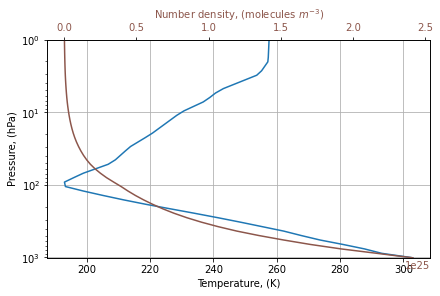

In [9]:
plt.figure(constrained_layout=True)
plt.grid()
plt.plot(t, p)
plt.ylabel('Pressure, (hPa)')
plt.xlabel('Temperature, (K)')
plt.ylim((np.max(p), np.min(p)))
plt.yscale('log')

color = 'tab:brown'
ax1 = plt.gca()
ax2 = ax1.twiny()
plt.sca(ax2)
plt.plot(n_a, p, color=color, label='air number density, [molecules $m^{-3}$]')
plt.xlabel('Number density, (molecules $m^{-3}$)', color=color)
plt.tick_params(axis='x', labelcolor=color)

Plot the ozone profiles in volume mixing ratio and number density.

Number density show where most of the ozone column is located.

Text(0.5, 1.0, 'Ozone profiles in different units')

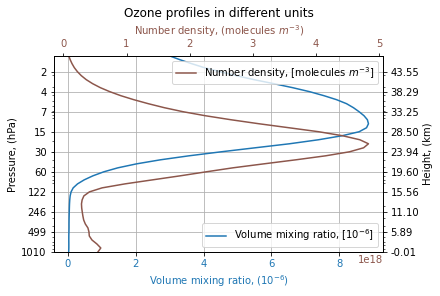

In [30]:
plt.figure(constrained_layout=True)
plt.grid()

color = 'tab:blue'
plt.plot(o3_ppmv, p, color=color, label='Volume mixing ratio, [$10^{-6}$]')
plt.ylabel('Pressure, (hPa)')
plt.xlabel('Volume mixing ratio, ($10^{-6}$)', color=color)
plt.tick_params(axis='x', labelcolor=color)
plt.ylim((np.max(p), np.min(p)))
plt.yscale('log')
plt.legend()

color = 'tab:brown'
ax1 = plt.gca()
ax_x2 = ax1.twiny()
plt.sca(ax_x2)
plt.plot(o3_number_density, p, color=color, label='Number density, [molecules $m^{-3}$]')
plt.xlabel('Number density, (molecules $m^{-3}$)', color=color)
plt.tick_params(axis='x', labelcolor=color)
plt.legend()

# add second y axis for height
p_ticks = p[::5]
z_ticks = z[::5]
ax_y2 = ax1.twinx()
ax_y2.set_yscale('log')

# set the same ticks on the left and right
ax1.set_yticks(p_ticks)
ax_y2.set_yticks(p_ticks)
# and the same limits
ax1.set_ylim((np.max(p), np.min(p)))
ax_y2.set_ylim((np.max(p), np.min(p)))

ax1.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax_y2.yaxis.set_major_formatter(ticker.ScalarFormatter())

# replace p labels with the appropriate z labels
z_tick_labels = ['{:.2f}'.format(z_tick/10**3) for z_tick in z_ticks]
ax_y2.set_yticklabels(z_tick_labels)
ax_y2.set_ylabel('Height, (km)')

plt.title('Ozone profiles in different units')